In [66]:
import plotly.graph_objects as go
# import kaleido
from plotly.subplots import make_subplots
import plotly.io as pio
import pandas as pd
import numpy as np
import json

from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm

# local modules 
import sys
sys.path.insert(0, "../scripts")
import helpers as h
import seaborn as sns

import matplotlib.pyplot as plt

from numpy.linalg import lstsq
import scipy.signal

In [3]:
a00, a01 = h.import_desired_data("A", "15T")
# TODO edit in function 
a00.set_index(a00["DateTime"].values, inplace=True)
a01.set_index(time.values, inplace=True)
print(a00["Window Open"].unique(), a01["Window Open"].unique(), a00.columns)

temp = a01["Temp C"]
time = a01["DateTime"]

[1.] [0. 1.] Index(['DateTime', 'Temp C', 'RH %', 'Room', 'Ambient Temp', 'Ambient RH',
       'Window Open'],
      dtype='object')


In [4]:
def make_fit(series, A, w, phi, w_t_var):
    n = len(series)
    t = np.arange(n)

    w_t = np.random.normal(0, 1, size=w_t_var)
    x_t = A*np.cos(2*np.pi*w*t + phi) # + w_t

    return x_t, t

In [25]:
def norm_grad(series):
    return h.normalize(np.gradient(series))

In [58]:
fig = go.Figure()

n_arr = np.arange(len(amb)) 

# close examine 
xsol, ysol = SegmentedLinearReg(n_arr, amb, [41, 67, 100, 135, 192, 231, 281, 330, 364])

# generalize 
peak_times = np.arange(4*2)
a = 30 + (100/2)*peak_times
a = np.append(a, [(a[1] + a[2])/2])
print(a)
xsol2, ysol2 = SegmentedLinearReg(n_arr, amb, a)
time_amb_sol = time.iloc[xsol2]


fig.add_trace(go.Scatter(
    x=n_arr,
    y=amb,
    name="Window",
    mode='lines',
))

fig.add_trace(go.Scatter( x=n_arr, y=amb, name="Ambient", mode='lines',
))

fig.add_trace(go.Scatter(x=xsol, y=ysol, name="Close Fit", mode='lines',
))

fig.add_trace(go.Scatter( x=xsol2, y=ysol2, name="Generalizable Fit", mode='lines', ))

maximum iteration reached
[ 30.  80. 130. 180. 230. 280. 330. 380. 105.]
maximum iteration reached


In [62]:
# normalized temperature 
norm_temp = h.normalize(temp)

# sinusoidal fit to normalized temp (eyeballing )
xt, t = make_fit(series=temp, A=-0.5, w=3.9*(1/(len(temp))), phi=0.8, w_t_var=1)
xt += 0.5

# difference and derivative 
dif_xt = norm_temp - xFot 
ddt_dif_xt= norm_grad(dif_xt)

# ambient temp 
amb = h.normalize(a00["Ambient Temp"])

# piece wise fit to ambient temp  
peak_times = np.arange(4*2) # 4 and a half days represented..
a = 30 + (100/2)*peak_times
a = np.append(a, [(a[1] + a[2])/2])
xsol2, fit_amb = SegmentedLinearReg(n_arr, amb, a)
time_amb_sol = time.iloc[xsol2]


# derivative ambient fit 
ddt_fit_amb = norm_grad(fit_amb)



fig = go.Figure()

fig.add_trace(go.Scatter(
    x=time, y=a01["Window Open"], name="Window", mode='lines',
))


fig.add_trace(go.Scatter(x=time, y=ddt_dif_xt, name="ddt_dif_xt", mode='lines',))

fig.add_trace(go.Scatter( x=time, y=amb,  name="Ambient", mode='lines',))

# fig.add_trace(go.Scatter( x=time,y=ddt_amb, name="ddt_Ambient", mode='lines',))

# fig.add_trace(go.Scatter( x=time, y=ddt2_amb,name="ddt_Ambient",mode='lines',))

fig.add_trace(go.Scatter( x=time_amb_sol, y=fit_amb, name="fit_amb", mode='lines', ))

fig.add_trace(go.Scatter( x=time_amb_sol, y=ddt_fit_amb, name="ddt_fit_amb", mode='lines', ))



maximum iteration reached


In [63]:
def create_corr_plot(series, plot_pacf=False):
   
    corr_array = sm.tsa.pacf(series.dropna(), alpha=0.05, nlags=(len(series)//2-1)) if plot_pacf else sm.tsa.acf(series.dropna(), alpha=0.05, nlags=(len(series)-1))
    lower_y = corr_array[1][:,0] - corr_array[0]
    upper_y = corr_array[1][:,1] - corr_array[0]
    print(len(corr_array[0]))

    fig = go.Figure()
    [fig.add_scatter(x=(x,x), y=(0,corr_array[0][x]), mode='lines',line_color='#3f3f3f') 
     for x in range(len(corr_array[0]))]
    fig.add_scatter(x=np.arange(len(corr_array[0])), y=corr_array[0], mode='markers', marker_color='#1f77b4',
                   marker_size=12)
    fig.add_scatter(x=np.arange(len(corr_array[0])), y=upper_y, mode='lines', line_color='rgba(255,255,255,0)')
    fig.add_scatter(x=np.arange(len(corr_array[0])), y=lower_y, mode='lines',fillcolor='rgba(32, 146, 230,0.3)',
            fill='tonexty', line_color='rgba(255,255,255,0)')
    fig.update_traces(showlegend=False)
    fig.update_xaxes(range=[-1,42])
    fig.update_yaxes(zerolinecolor='#000000')
    
    title='Partial Autocorrelation (PACF)' if plot_pacf else 'Autocorrelation (ACF)'
    fig.update_layout(title=title)
    fig.show()

    return corr_array

/Users/julietnwagwuume-ezeoke/_UILCode/windows/localwindowsenv/lib/python3.10/site-packages/scipy/signal/_spectral_py.py:1961: UserWarning:

nperseg = 1024 is greater than input length  = 385, using nperseg = 385



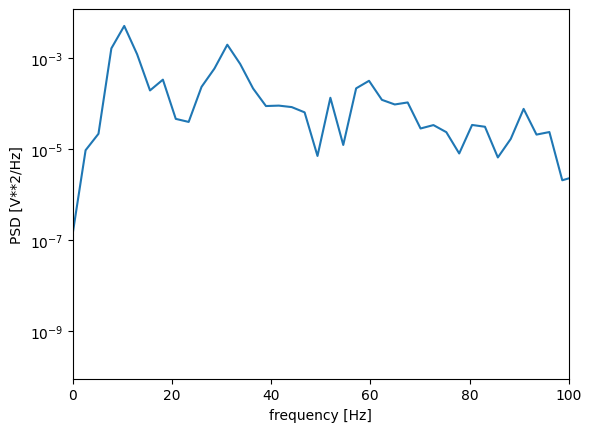

In [67]:
# f contains the frequency components
# S is the PSD
fs = 1000
signal = ddt_dif_xt
(f, S)= scipy.signal.welch(signal, fs, nperseg=1024)

plt.semilogy(f, S)
plt.xlim([0, 100])
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()

In [68]:
corr_array = create_corr_plot(pd.Series(ddt_dif_xt))

385


In [32]:
ramp = lambda u: np.maximum( u, 0 )
step = lambda u: ( u > 0 ).astype(float)

def SegmentedLinearReg( X, Y, breakpoints ):
    nIterationMax = 10

    breakpoints = np.sort( np.array(breakpoints) )

    dt = np.min( np.diff(X) )
    ones = np.ones_like(X)

    for i in range( nIterationMax ):
        # Linear regression:  solve A*p = Y
        Rk = [ramp( X - xk ) for xk in breakpoints ]
        Sk = [step( X - xk ) for xk in breakpoints ]
        A = np.array([ ones, X ] + Rk + Sk )
        p =  lstsq(A.transpose(), Y, rcond=None)[0] 

        # Parameters identification:
        a, b = p[0:2]
        ck = p[ 2:2+len(breakpoints) ]
        dk = p[ 2+len(breakpoints): ]

        # Estimation of the next break-points:
        newBreakpoints = breakpoints - dk/ck 

        # Stop condition
        if np.max(np.abs(newBreakpoints - breakpoints)) < dt/5:
            break

        breakpoints = newBreakpoints
    else:
        print( 'maximum iteration reached' )

    # Compute the final segmented fit:
    Xsolution = np.insert( np.append( breakpoints, max(X) ), 0, min(X) )
    ones =  np.ones_like(Xsolution) 
    Rk = [ c*ramp( Xsolution - x0 ) for x0, c in zip(breakpoints, ck) ]

    Ysolution = a*ones + b*Xsolution + np.sum( Rk, axis=0 )

    return Xsolution, Ysolution